In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from Simulate import *
sim = Simulator()

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sim.detector.reset()

position = [0.,0.]
velocity = [0.05,0.001]

pt=np.linalg.norm(velocity)
phi=np.arctan2(velocity[1],velocity[0])
xVtx=position[0]
yVtx=position[1]

simtrack1=sim.propagate([0.5,0.5],[500.,0],1,id=0)
simtrack2=sim.propagate([0.5,0.5],[0.,500],-1,id=1)


#simtrack2=sim.propagate([0.2,0.2],[-100,2000], id=1)
#simtrack3=sim.propagate([0.,0.],[-1000,100], id=2)
#simtrack4=sim.propagate([0.,0.],[20,-200], id=3)

hits=sim.detector.getHits()

Particle id=0 at layer -1 iphi -1 (x,y)=(0.5,0.5) (px,py)=(500.0,0.0) ch=1
tocenter= [   -0.          1666.66666667    -0.        ]  radius= 1666.66666667
rotcenter= [  5.00000000e-01   1.66716667e+03   0.00000000e+00]
nextrho=  39  vintersect=  [[-38.9879886    0.96785604   0.        ]
 [ 38.98856212   0.94447009   0.        ]]
newphipos= 0.0242195495445 iphi= 37 cell phi 0.0237173899577
Particle id=0 at layer 0 iphi 37 (x,y)=(38.9885621208,0.944470090337) (px,py)=(499.844897914,12.4530329491) ch=1
tocenter= [  -41.51010983  1666.14965971    -0.        ]  radius= 1666.66666667
rotcenter= [   -2.52154771  1667.0941298      0.        ]
nextrho=  85  vintersect=  [[-84.96417022   2.46774777   0.        ]
 [ 84.95631634   2.72475942   0.        ]]
newphipos= 0.0320614857301 iphi= 109 cell phi 0.0320585684821
Particle id=0 at layer 1 iphi 109 (x,y)=(84.9563163403,2.72475941672) (px,py)=(499.425799073,23.955609372) ch=1
tocenter= [  -79.85203124  1664.75266358    -0.        ]  radius= 1666.

Simulate.py:171: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  self.history=self.history.sort(['particle','layer','hit'])


In [3]:
#q=Detector()
#q.Nrho


In [4]:
x=hits['x'].values
y=hits['y'].values
print x
print y


[  38.98903148   84.95632429  154.81615969  212.54335434  270.08506939
  401.94210198  553.70999987  741.13048354  952.36429199    0.96237963
    2.56833859    7.47205474   13.54703401   21.43998553   47.46547616
   91.14435825  166.34908873]
[   0.92489149    2.72451158    7.54696618   13.93996154   22.24983799
   49.67440649   96.17294862  177.11467009  304.9627114    38.98812416
   84.961189    154.8197933   212.56876033  270.15056361  402.20893647
  554.55992098  743.62085815]


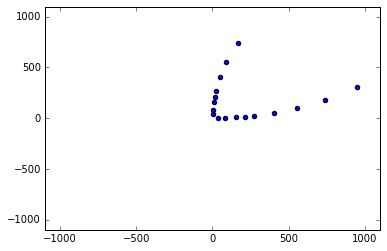

In [5]:
plt.scatter(x,y)
#plt.axis('equal')

axes = plt.gca()
axes.set_xlim([-1100,1100])
axes.set_ylim([-1100,1100])


plt.show()

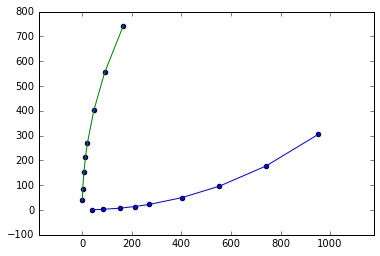

In [6]:
plt.plot(simtrack1['x'].values,simtrack1['y'].values)
plt.plot(simtrack2['x'].values,simtrack2['y'].values)
#plt.plot(simtrack3['x'].values,simtrack3['y'].values)
#plt.plot(simtrack4['x'].values,simtrack4['y'].values)

plt.scatter(x,y)
plt.axis('equal')

axes = plt.gca()
#axes.set_xlim([-2,2])
#axes.set_ylim([-2,2])

plt.show()

In [7]:
simtrack1['x']

0     38.988562
1     84.956316
2    154.816087
3    212.541792
4    270.084665
5    401.936248
6    553.703293
7    741.119057
8    952.349867
Name: x, dtype: float64

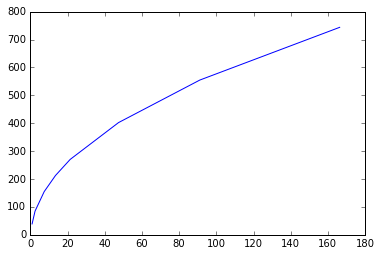

In [8]:
sim.plot()

In [9]:
sim.detector.cells_r

array([  39,   85,  155,  213,  271,  405,  562,  762, 1000])

In [ ]:
x,y

(array([  38.98903148,   84.95632429,  154.81615969,  212.54335434,
         270.08506939,  401.94210198,  553.70999987,  741.13048354,
         952.36429199]),
 array([   0.92489149,    2.72451158,    7.54696618,   13.93996154,
          22.24983799,   49.67440649,   96.17294862,  177.11467009,
         304.9627114 ]))

In [ ]:
fit(x,y)

In [ ]:
aa=[]
aa+=[2]
aa+=[3]
aa